<a href="https://colab.research.google.com/github/hinton024/Bharat-Intern/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing csv file

In [42]:
housing<-read.csv("https://raw.githubusercontent.com/hinton024/Bharat-Intern/main/House%20Price%20Prediction/Housing.csv")
head(housing)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
5,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
6,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


# Converting classification type data in mainroad, guestroom etc columns to zero and one form to better understand of computer and to perform operations

In [43]:
# install.packages("caret")
library(caret)

# Convert "yes" to 1 and "no" to 0 using ifelse function
housing$mainroad <- ifelse(housing$mainroad == "yes", 1, 0)
housing$guestroom <- ifelse(housing$guestroom == "yes", 1, 0)
housing$basement <- ifelse(housing$basement == "yes", 1, 0)
housing$hotwaterheating <- ifelse(housing$hotwaterheating	 == "yes", 1, 0)
housing$airconditioning <- ifelse(housing$airconditioning == "yes", 1, 0)
housing$prefarea <- ifelse(housing$prefarea	 == "yes", 1, 0)

library(dplyr)
# Assuming 'housing' is your data frame with the "furnishingstatus" column
# Convert the "furnishingstatus" column to factor (if not already)
housing$furnishingstatus <- as.factor(housing$furnishingstatus)

# Use dplyr's mutate() and if_else() to create separate columns
housing <- housing %>%
  mutate(
    unfurnished = if_else(furnishingstatus == "unfurnished", 1, 0),
    semi_furnished = if_else(furnishingstatus == "semi-furnished", 1, 0),
    furnished = if_else(furnishingstatus == "furnished", 1, 0)
  )

# Remove the original "furnishingstatus" column
housing$furnishingstatus <- NULL
head(housing)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished,semi_furnished,furnished
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1
2,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,1
3,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
4,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1
5,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1
6,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0


# Scatter plot between area and price

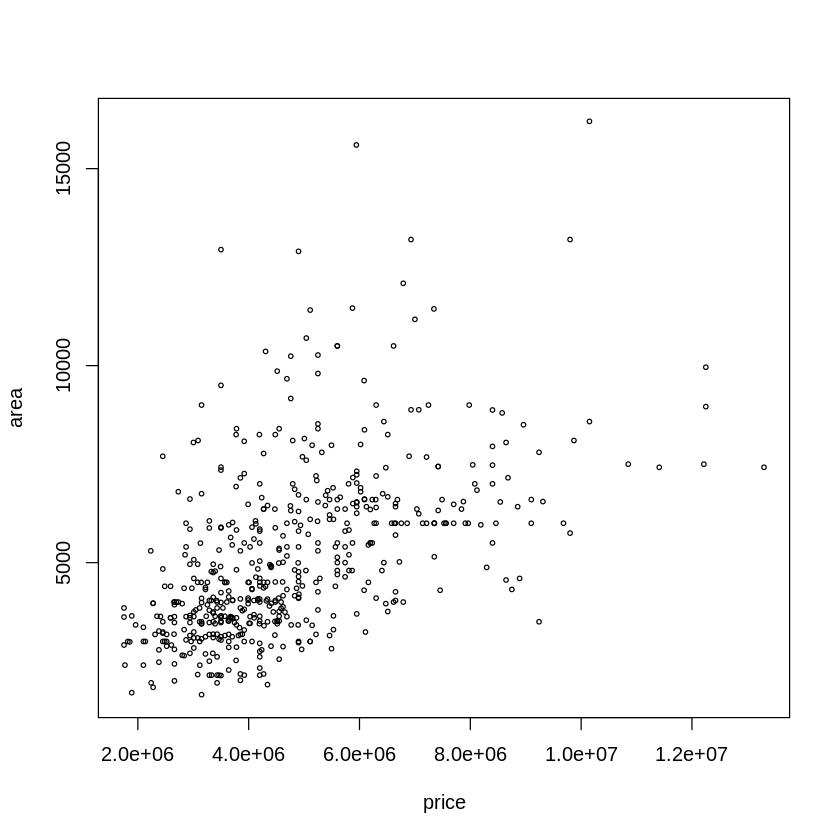

In [28]:
plot(housing$price,housing$area,xlab="price",ylab="area",cex=0.5)


# Histogram for price of houses

Warning message in plot.window(xlim, ylim, "", ...):
“"title" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"title" is not a graphical parameter”
Warning message in axis(1, ...):
“"title" is not a graphical parameter”
Warning message in axis(2, at = yt, ...):
“"title" is not a graphical parameter”


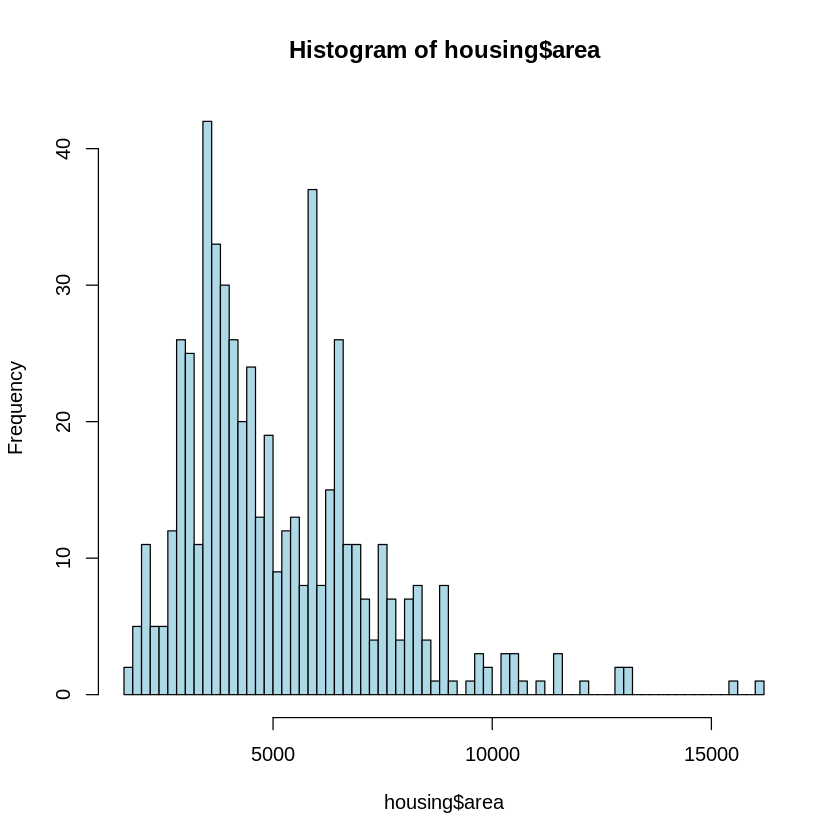

In [53]:
hist(housing$area, breaks = 80, col = "lightblue", border = "black",title = "Distribution of area")

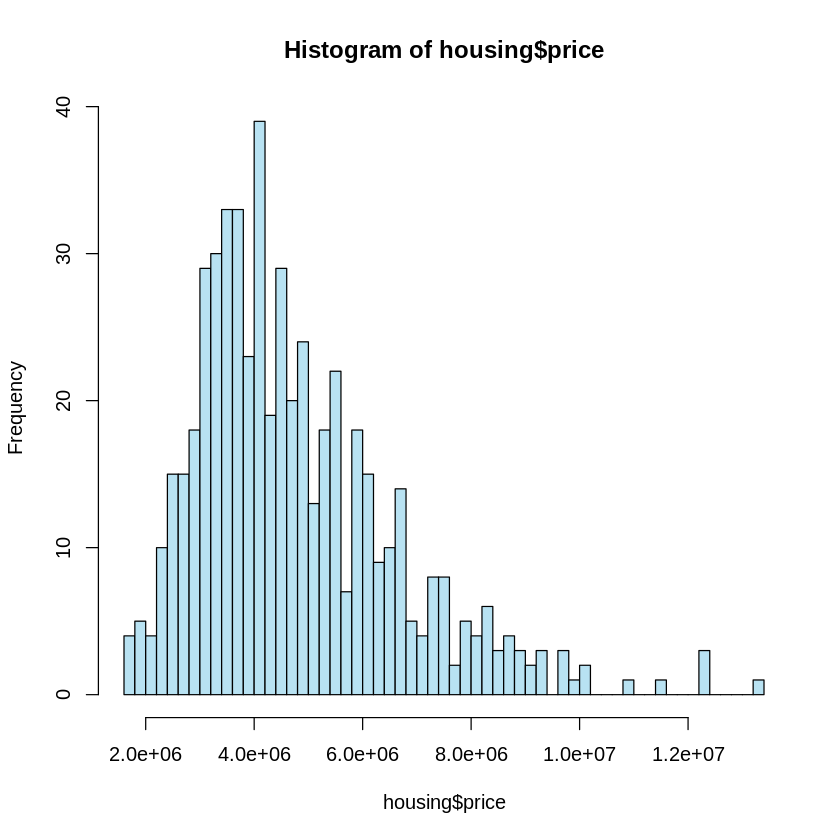

In [57]:
hist(housing$price, breaks = 80, col = "#B8E2F2", border = "black")

# Dividing the dataset into training and testing dataset




In [58]:
set.seed(2)
# install.packages("caTools")
library(caTools)

split<-sample.split(housing$price,SplitRatio = 0.7)

training<-subset(housing,split==T)
testing<-subset(housing,split==F)
head(training)
head(testing)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished,semi_furnished,furnished
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1
3,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
4,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1
5,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1
6,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
7,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished,semi_furnished,furnished
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,1
8,10150000,16200,5,3,2,1,0,0,0,0,0,0,1,0,0
11,9800000,13200,3,1,2,1,0,1,0,1,2,1,0,0,1
15,9240000,7800,3,2,2,1,0,0,0,0,0,1,0,1,0
17,9100000,6600,4,2,2,1,1,1,0,1,1,1,1,0,0
23,8645000,8050,3,1,1,1,1,1,0,1,1,0,0,0,1


The following objects are masked from housing (pos = 6):

    airconditioning, area, basement, bathrooms, bedrooms, furnished,
    guestroom, hotwaterheating, mainroad, parking, prefarea, price,
    semi_furnished, stories, unfurnished


The following objects are masked from housing (pos = 7):

    airconditioning, area, basement, bathrooms, bedrooms, furnished,
    guestroom, hotwaterheating, mainroad, parking, prefarea, price,
    semi_furnished, stories, unfurnished




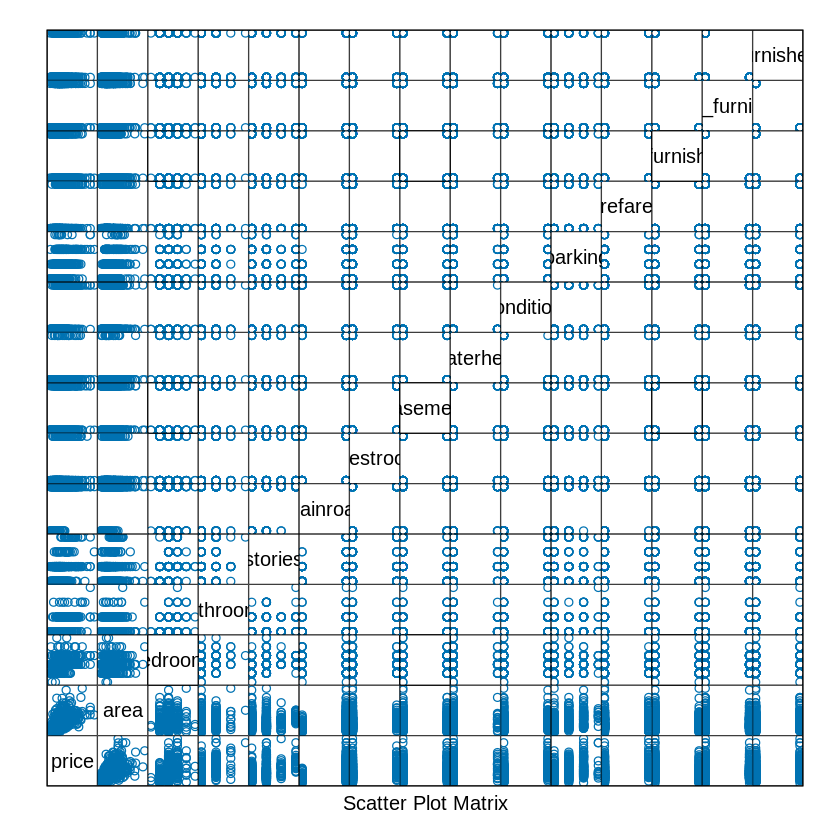

In [60]:
#create scatter plot
attach(housing)
library(lattice)
splom(~housing,groups=NULL,data=housing,axis.line.tck=0,axis.text.alpha=0)
# splom(~housing[(c(7:14))],groups=NULL,data=Boston,axis.line.tck=0,axis.text.alpha=0)


# Finding correlation between all the parameters of housing dataset

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



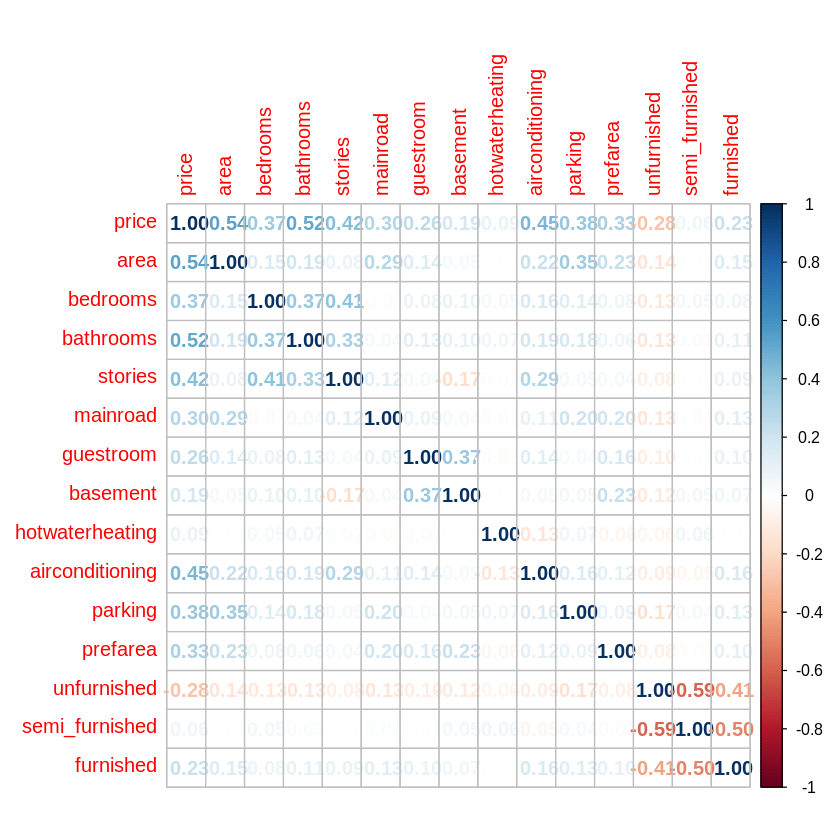

In [63]:
#plot correlation plot
# install.packages("corrplot")
library(corrplot)
corrplot(cr,type="full",method="number")

In [64]:
# install.packages("caret")
library(caret)

numeric_data<-housing[sapply(housing,is.numeric)]
# numeric_data
descrrCor<-cor(numeric_data)
descrrCor

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished,semi_furnished,furnished
price,1.00000000,0.535997346,0.36649403,0.51754534,0.420712366,0.29689849,0.25551729,0.187056598,0.093072844,0.45295408,0.38439365,0.32977705,-0.28058736,0.063656338,0.229350312
area,0.53599735,1.000000000,0.15185849,0.19381953,0.083996051,0.28887411,0.14029659,0.047416989,-0.009229236,0.22239310,0.35298048,0.23477880,-0.14227821,0.006156164,0.145771713
bedrooms,0.36649403,0.151858486,1.00000000,0.37393024,0.408564238,-0.01203324,0.08054870,0.097312424,0.046048887,0.16060326,0.13926990,0.07902306,-0.12625202,0.050039947,0.079054348
bathrooms,0.51754534,0.193819531,0.37393024,1.00000000,0.326164706,0.04239762,0.12646884,0.102105706,0.067159096,0.18691503,0.17749582,0.06347174,-0.13210748,0.029833530,0.108138903
stories,0.42071237,0.083996051,0.40856424,0.32616471,1.000000000,0.12170613,0.04353767,-0.172393617,0.018846511,0.29360200,0.04554709,0.04442487,-0.08297194,-0.003648305,0.093176489
mainroad,0.29689849,0.288874114,-0.01203324,0.04239762,0.121706131,1.00000000,0.09233692,0.044002081,-0.011781490,0.10542300,0.20443255,0.19987578,-0.13312327,0.011450332,0.129971476
guestroom,0.25551729,0.140296590,0.08054870,0.12646884,0.043537672,0.09233692,1.00000000,0.372065708,-0.010307884,0.13817877,0.03746575,0.16089694,-0.09902318,0.005820580,0.099721498
basement,0.18705660,0.047416989,0.09731242,0.10210571,-0.172393617,0.04400208,0.37206571,1.000000000,0.004384836,0.04734119,0.05149718,0.22808285,-0.11793533,0.050284409,0.069851585
hotwaterheating,0.09307284,-0.009229236,0.04604889,0.06715910,0.018846511,-0.01178149,-0.01030788,0.004384836,1.000000000,-0.13002283,0.06786389,-0.05941138,-0.05919355,0.063818795,-0.008471584
airconditioning,0.45295408,0.222393104,0.16060326,0.18691503,0.293602000,0.10542300,0.13817877,0.047341189,-0.130022833,1.00000000,0.15917268,0.11738210,-0.09408642,-0.053179403,0.160993767



Call:
lm(formula = price ~ ., data = training)

Residuals:
     Min       1Q   Median       3Q      Max 
-2708658  -658840   -54350   537681  5151619 

Coefficients: (1 not defined because of singularities)
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      117726.58  323748.90   0.364  0.71633    
area                211.47      29.56   7.153 4.29e-12 ***
bedrooms         108464.84   88516.76   1.225  0.22119    
bathrooms       1068063.83  127782.89   8.358 1.16e-15 ***
stories          415935.87   77519.51   5.366 1.39e-07 ***
mainroad         503366.29  173569.57   2.900  0.00394 ** 
guestroom        444627.25  159076.71   2.795  0.00545 ** 
basement         380607.31  135443.45   2.810  0.00521 ** 
hotwaterheating  695963.26  249075.58   2.794  0.00546 ** 
airconditioning  855312.67  132230.86   6.468 3.00e-10 ***
parking          350741.88   71454.07   4.909 1.36e-06 ***
prefarea         583600.80  138437.14   4.216 3.11e-05 ***
unfurnished     -483416.9

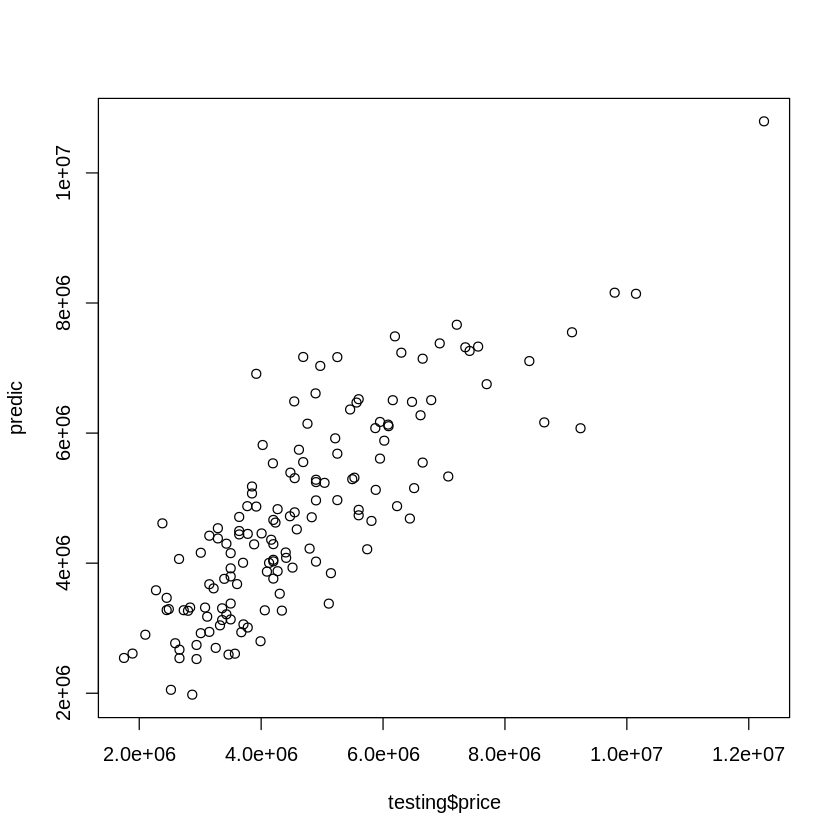

In [65]:
# install.packages("car")
library(car)

model<-lm(price~.,training)

summary(model)

predic<-predict(model,testing)

# plot(testing$price,type="l",col="red")
# lines(predic,type="l",col="blue")
plot(testing$price,predic)
